In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
tf.__version__

'2.2.0'

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
data = pd.read_csv("Movies-Poster_Dataset/train.csv")
img_width = 350
img_height = 350

X_temp = []

In [6]:
for i in tqdm(range(data.shape[0])):
        path = "Movies-Poster_Dataset/Images/" + data["Id"][i] + ".jpg"
        img = image.load_img(path,target_size=(img_width,img_height,3))
        img = image.img_to_array(img)/255.0
        X_temp.append(img)
X = np.array(X_temp)

100%|████████████████████████████████████████████████████████████| 7254/7254 [00:47<00:00, 151.84it/s]


In [7]:
y = data.drop(['Id','Genre'],axis = 1)
y = y.to_numpy()
print(y.shape)

print(X.shape)



(7254, 25)
(7254, 350, 350, 3)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size = 0.15)

# Buidling the CNN

In [9]:
model = Sequential()
#First CNN Layer
model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#Second CNN Layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#Third CNN Layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

#Fourth CNN Layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

#First Fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Second Fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(25, activation='sigmoid'))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
193/193 [==============================] - 530s 3s/step - loss: 0.7067 - accuracy: 0.0988 - val_loss: 0.4780 - val_accuracy: 0.1901
Epoch 2/5
193/193 [==============================] - 532s 3s/step - loss: 0.3113 - accuracy: 0.2448 - val_loss: 0.2958 - val_accuracy: 0.1901
Epoch 3/5
193/193 [==============================] - 522s 3s/step - loss: 0.2618 - accuracy: 0.2863 - val_loss: 0.2490 - val_accuracy: 0.1901
Epoch 4/5
193/193 [==============================] - 512s 3s/step - loss: 0.2522 - accuracy: 0.2941 - val_loss: 0.2434 - val_accuracy: 0.1901
Epoch 5/5
193/193 [==============================] - 513s 3s/step - loss: 0.2462 - accuracy: 0.3134 - val_loss: 0.2433 - val_accuracy: 0.1910


In [13]:
def plot_learningCurve(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range, history.history["accuracy"])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train","Val"], loc = "upper left")
    plt.show()

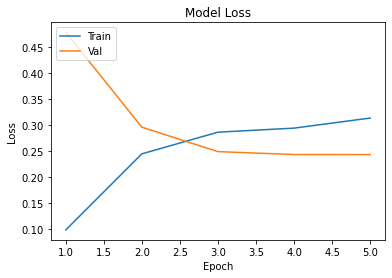

In [15]:
plot_learningCurve(history,5)

Index(['Drama', 'Comedy', 'Adventure'], dtype='object')

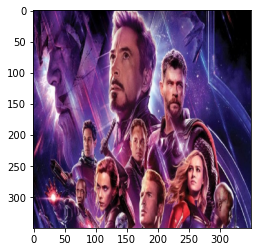

In [25]:
path = "Movies-Poster_Dataset/endgame.jpg"

img = image.load_img(path,target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)/255.0
img = img.reshape(1,img_width, img_height,3)

classes = data.columns[2:]

y_prob = model.predict(img)

top3 = np.argsort(y_prob[0])[:-4:-1]
classes[top3]



Index(['Drama', 'Comedy', 'Documentary', 'Romance', 'Adventure'], dtype='object')

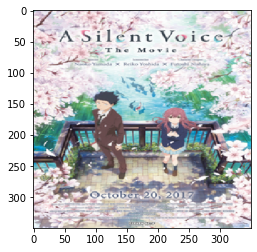

In [28]:
path = "Movies-Poster_Dataset/A_Silent_Voice_Film_Poster.jpg"
img = image.load_img(path,target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)/255.0
img = img.reshape(1,img_width, img_height,3)

classes = data.columns[2:]

y_prob = model.predict(img)

top5 = np.argsort(y_prob[0])[:-6:-1]
classes[top5]